## Goal: 
Load the classic Iris dataset, do some wrangling with Polars, convert to NumPy to compute z-scores, and make a scatter plot with Matplotlib.

### Imports

In [18]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

### Data Load

In [5]:
df = pl.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

print(df.head())

shape: (5, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬─────────┐
│ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ species │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---     │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str     │
╞══════════════╪═════════════╪══════════════╪═════════════╪═════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ setosa  │
│ 4.9          ┆ 3.0         ┆ 1.4          ┆ 0.2         ┆ setosa  │
│ 4.7          ┆ 3.2         ┆ 1.3          ┆ 0.2         ┆ setosa  │
│ 4.6          ┆ 3.1         ┆ 1.5          ┆ 0.2         ┆ setosa  │
│ 5.0          ┆ 3.6         ┆ 1.4          ┆ 0.2         ┆ setosa  │
└──────────────┴─────────────┴──────────────┴─────────────┴─────────┘


### Filter and Aggregate

In [11]:
summary = (
    df
    .group_by("species")
    .agg([
        pl.col("sepal_length").mean().alias("mean_sepal_l"),
        pl.col("sepal_width").mean().alias("mean_sepal_w"),
    ])
)
print(summary)

shape: (3, 3)
┌────────────┬──────────────┬──────────────┐
│ species    ┆ mean_sepal_l ┆ mean_sepal_w │
│ ---        ┆ ---          ┆ ---          │
│ str        ┆ f64          ┆ f64          │
╞════════════╪══════════════╪══════════════╡
│ versicolor ┆ 5.936        ┆ 2.77         │
│ virginica  ┆ 6.588        ┆ 2.974        │
│ setosa     ┆ 5.006        ┆ 3.428        │
└────────────┴──────────────┴──────────────┘


### NumPy Time

In [13]:
arr = df.select(["sepal_length", "sepal_width"]).to_numpy()

means = arr.mean(axis=0)
stds = arr.std(axis=0)
z_scores = (arr - means) / stds



### Plot with Matplotlib

{'virginica', 'setosa', 'versicolor'}
{'virginica': 0, 'setosa': 1, 'versicolor': 2}
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


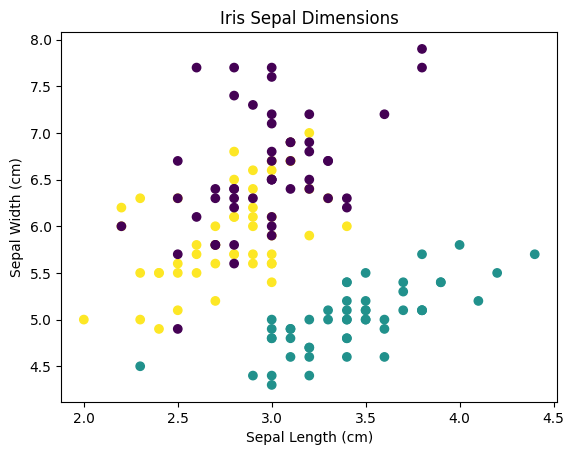

In [20]:
species = df["species"].to_list()
print(set(species))
map_spec = {name:i for i, name in enumerate(set(species))}
print(map_spec)
colors = [ map_spec[s] for s in species ]
print(colors)

plt.scatter(arr[:,0], arr[:,1], c=colors)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Sepal Dimensions")
plt.show()

